failed to load PPO-3


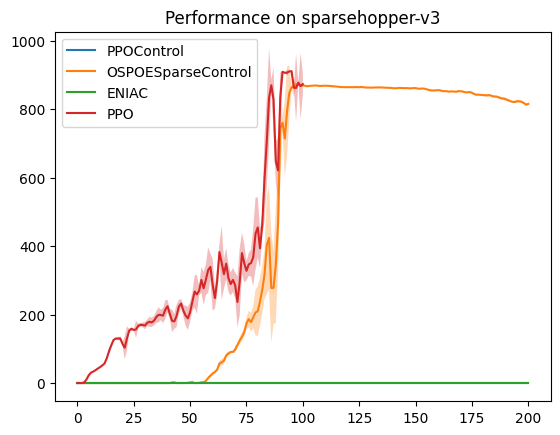

In [386]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import convolve

bk = True
names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC', 'OSPOESparse', 'PPOControl', 'OSPOESparseControl']
# names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC', 'OSPOESparse', 'PPOControl']
names = ['OSPOESparseControl', 'ENIAC', 'PPOControl', 'RND', 'OSPOE']
names = ['OSPOESparseControl', 'ENIAC', 'PPOControl']
# names = ['PPOControl']
names = ['PPOControl', 'OSPOESparseControl', 'ENIAC']
names = ['PPOControl', 'OSPOESparseControl', 'ENIAC', 'PPO']
table = {}
table_std = {}
# env = 'sparsehalfcheetah'
env_type = 'hopper'
env = f'sparse{env_type}'
for name in names:
    for run in range(4):
        try:
            filename = f'./Mujoco_eval_{env}_env64/{name}-seed{run}_mean.npy'
            table[name] = np.load(filename)
            filename_std = f'./Mujoco_eval_{env}_env64/{name}-seed{run}_std.npy'
            table_std[name] = np.load(filename_std) / 2
            # print(name)
        except:
            print(f'failed to load {name}-{run}')
            
plt.figure()
plt.title(f'Performance on {env}-v3')
l = 2
for k in table.keys():
    kernel = np.ones(l) / l
    y = table[k]
    y_ = convolve(y, kernel, mode='valid')
    std_ = table_std[k][:len(y_)]
    plt.plot(y_, label=k)
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.3)

plt.legend()

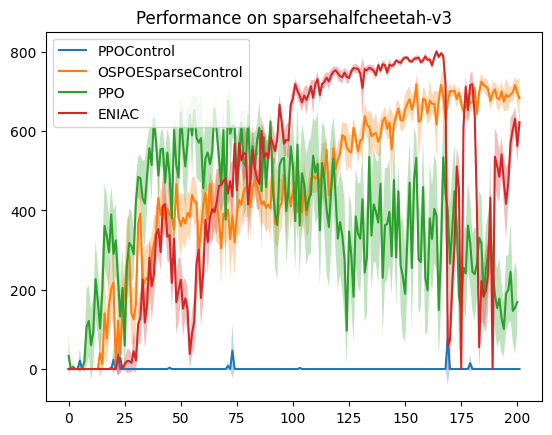

In [365]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import convolve

bk = True
names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC', 'OSPOESparse', 'PPOControl', 'OSPOESparseControl']
# names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC', 'OSPOESparse', 'PPOControl']
names = ['OSPOESparseControl', 'ENIAC', 'PPOControl', 'RND', 'OSPOE']
names = ['OSPOESparseControl', 'ENIAC', 'PPOControl']
names = ['PPOControl', 'OSPOESparseControl', 'PPO', 'ENIAC']
# names = ['PPOControl', 'OSPOESparseControl', 'ENIAC']
table = {}
table_std = {}
# env = 'sparsehalfcheetah'
env_type = 'halfcheetah'
env = f'sparse{env_type}'
for name in names:
    for run in range(1):
        # try:
        #     filename = f'./Mujoco_eval_{env}_env128/{name}-seed{run}_mean.npy'
        #     table[name] = np.load(filename)
        #     filename_std = f'./Mujoco_eval_{env}_env128/{name}-seed{run}_std.npy'
        #     table_std[name] = np.load(filename_std) / 2
        #     print(name)
        # except:
            filename = f'./Mujoco_eval_{env}_env64/{name}-seed{run}_mean.npy'
            table[name] = np.load(filename)
            filename_std = f'./Mujoco_eval_{env}_env64/{name}-seed{run}_std.npy'
            table_std[name] = np.load(filename_std) / 2
            # print(name)
            
plt.figure()
plt.title(f'Performance on {env}-v3')
l = 1
for k in table.keys():
    kernel = np.ones(l) / l
    y = table[k]
    y_ = convolve(y, kernel, mode='valid')
    std_ = table_std[k][:len(y_)]
    plt.plot(y_, label=k)
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.3)

plt.legend()

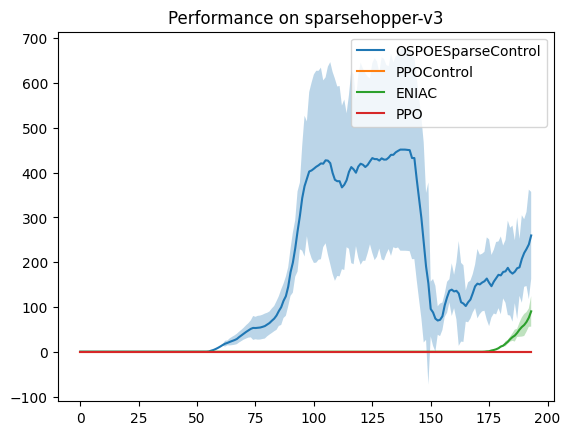

In [396]:
names = ['OSPOESparseControl', 'PPOControl', 'ENIAC', 'PPO']
# names = ['ENIAC', 'PPOControl']
# names = ['OSPOESparseControl']
table = {}
table_std = {}
env_type = 'walk'
env = f"sparse{env_type}"
i = 2
limit = 200
for name in names:
    for run in range(i):
        # try:
        #     filename = f'./Mujoco_eval_{env}_env128/{name}-seed{run}_mean.npy'
        #     table[name] = np.load(filename)
        #     filename_std = f'./Mujoco_eval_{env}_env128/{name}-seed{run}_std.npy'
        #     table_std[name] = np.load(filename_std) / 2
        #     print(name)F
        # except:
            filename = f'./Mujoco_eval_{env}_env64/{name}-seed{run}_mean.npy'
            if name not in table:
                table[name] = [np.load(filename)[:limit]]
            else:
                table[name].append(np.load(filename)[:limit])
    table[name] = np.array(table[name])
            
                       
plt.figure()
plt.title(f'Performance on {env}-v3')
l = 7
for k in table.keys():
    kernel = np.ones(l) / l
    y = table[k].mean(axis=0)
    std = table[k].std(axis=0) / 2
    y_ = convolve(y, kernel, mode='valid')
    std_ = std[:len(y_)]
    plt.plot(y_, label=k)
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.3)

plt.legend()